In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [329]:
chocolate_data = pd.read_csv("data/flavors_of_cacao.csv")
chocolate_data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [330]:
#Improve Column Name Formatting
def name_cleaner(old_name):
    new_name = old_name.replace("\n", " ")
    return new_name

try:
    chocolate_data.rename(name_cleaner, axis=1, inplace=True)
except:
    print("Columns already renamed.")


In [331]:
chocolate_data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [332]:
renaming_table = {
    "Company\xa0 (Maker-if known)": "Company",
    "Specific Bean Origin or Bar Name": "Bean_origin_bar_name",
    "REF": "Ref",
    "Review Date": "Review_date",
    "Cocoa Percent": "Cocoa_percent",
    "Company Location": "Company_location",
    "Rating": "Rating",
    "Bean Type": "Bean_type",
    "Broad Bean Origin": "Broad_bean_origin"
}

try:
    chocolate_data.rename(renaming_table, axis=1, inplace=True)
except:
    print()

In [333]:
chocolate_data.head()

,Company,Bean_origin_bar_name,Ref,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [334]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Bean_origin_bar_name  1795 non-null   object 
 2   Ref                   1795 non-null   int64  
 3   Review_date           1795 non-null   int64  
 4   Cocoa_percent         1795 non-null   object 
 5   Company_location      1795 non-null   object 
 6   Rating                1795 non-null   float64
 7   Bean_type             1794 non-null   object 
 8   Broad_bean_origin     1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [335]:
chocolate_data.isna().sum()

Company                 0
Bean_origin_bar_name    0
Ref                     0
Review_date             0
Cocoa_percent           0
Company_location        0
Rating                  0
Bean_type               1
Broad_bean_origin       1
dtype: int64

In [336]:
try:
    chocolate_data.dropna(inplace=True)
except:
    print()

In [337]:
chocolate_data.head()

,Company,Bean_origin_bar_name,Ref,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [338]:
chocolate_data.head()


,Company,Bean_origin_bar_name,Ref,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [339]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1793 non-null   object 
 1   Bean_origin_bar_name  1793 non-null   object 
 2   Ref                   1793 non-null   int64  
 3   Review_date           1793 non-null   int64  
 4   Cocoa_percent         1793 non-null   object 
 5   Company_location      1793 non-null   object 
 6   Rating                1793 non-null   float64
 7   Bean_type             1793 non-null   object 
 8   Broad_bean_origin     1793 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


In [340]:
chocolate_data['Cocoa_percent'] = chocolate_data['Cocoa_percent'].astype(str).str.replace('%', '').astype(float)
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1793 non-null   object 
 1   Bean_origin_bar_name  1793 non-null   object 
 2   Ref                   1793 non-null   int64  
 3   Review_date           1793 non-null   int64  
 4   Cocoa_percent         1793 non-null   float64
 5   Company_location      1793 non-null   object 
 6   Rating                1793 non-null   float64
 7   Bean_type             1793 non-null   object 
 8   Broad_bean_origin     1793 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 140.1+ KB


In [341]:
chocolate_data.head()

,Company,Bean_origin_bar_name,Ref,Review_date,Cocoa_percent,Company_location,Rating,Bean_type,Broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [342]:
chocolate_data.describe()


,Ref,Review_date,Cocoa_percent,Rating
count,1793.000000,1793.000000,1793.000000,1793.000000
mean,1036.126046,2012.326269,71.699108,3.185862
std,553.128742,2.928666,6.326515,0.477668
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,3.000000
50%,1073.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [343]:
#the average rating of the most common cocoa percentages
cocoa_rating_summary = chocolate_data.groupby('Cocoa_percent').agg(
    count=('Rating', 'size'), 
    average_rating=('Rating', 'mean')
).sort_values(by='count', ascending=False)


top_cocoa_percentages = cocoa_rating_summary.head(5)
top_cocoa_percentages

,count,average_rating
Cocoa_percent,,
70.0,671,3.274963
75.0,222,3.177928
72.0,188,3.194149
65.0,78,3.169872
80.0,72,3.027778


In [344]:
# Calculating the average rating by Company_location
company_location_rating = chocolate_data.groupby('Company_location')['Rating'].mean().sort_values(ascending=False)

# Displaying the results
company_location_rating

Company_location
Chile                3.750000
Amsterdam            3.500000
Netherlands          3.500000
Philippines          3.500000
Iceland              3.416667
Vietnam              3.409091
Brazil               3.397059
Poland               3.375000
Australia            3.357143
Guatemala            3.350000
Switzerland          3.342105
Singapore            3.333333
Italy                3.325397
Scotland             3.325000
Canada               3.318548
Argentina            3.305556
Denmark              3.283333
Spain                3.270000
France               3.251603
Suriname             3.250000
Israel               3.250000
Finland              3.250000
Fiji                 3.250000
Bolivia              3.250000
Russia               3.250000
Austria              3.240385
Honduras             3.208333
Hungary              3.204545
South Korea          3.200000
Domincan Republic    3.200000
New Zealand          3.191176
Germany              3.178571
Venezuela            3.

In [345]:
# Calculating the average rating by Bean_type
bean_type_rating = chocolate_data.groupby('Bean_type')['Rating'].mean().sort_values(ascending=False)

# Displaying the results
bean_type_rating

Bean_type
Criollo (Wild)              4.000000
Criollo (Ocumare 67)        4.000000
Trinitario (85% Criollo)    3.875000
Trinitario, TCGA            3.750000
Amazon mix                  3.750000
Criollo (Ocumare 77)        3.750000
Trinitario, Nacional        3.750000
Forastero (Amelonado)       3.750000
Blend-Forastero,Criollo     3.750000
Criollo, Forastero          3.625000
Amazon, ICS                 3.625000
Beniano                     3.583333
EET                         3.583333
Forastero (Parazinho)       3.531250
Trinitario (Scavina)        3.500000
Forastero (Arriba) ASSS     3.500000
CCN51                       3.500000
Criollo, +                  3.500000
Matina                      3.416667
Criollo (Porcelana)         3.375000
Forastero (Catongo)         3.375000
Blend                       3.353659
Criollo, Trinitario         3.294872
Forastero (Nacional)        3.269231
Nacional (Arriba)           3.250000
Amazon                      3.250000
Criollo (Ocumare 61)        

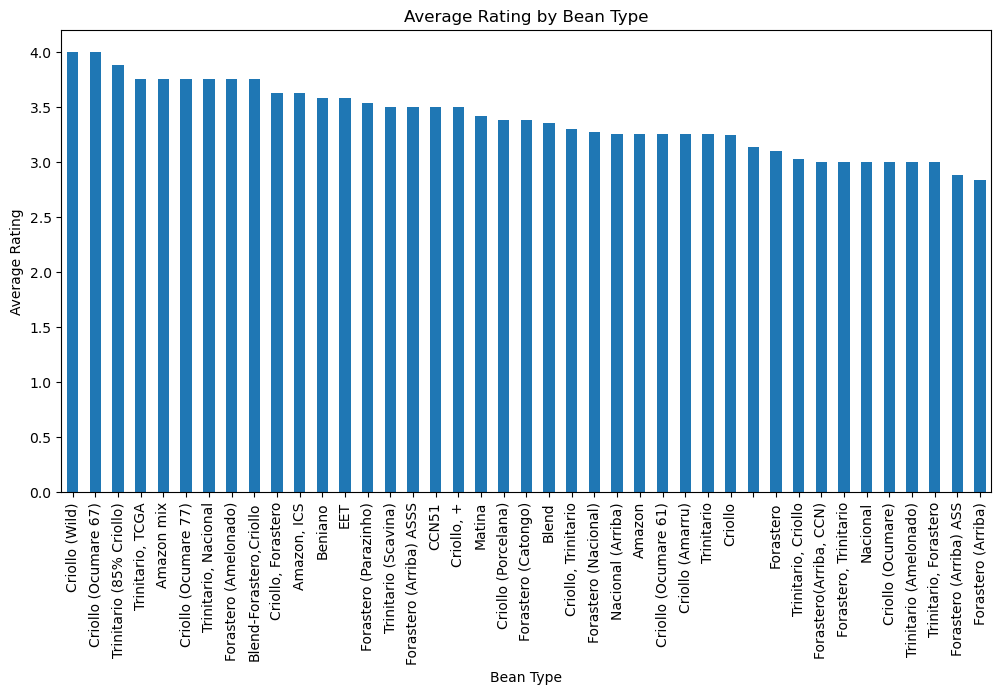

In [346]:
bean_type_rating.plot(kind='bar', figsize=(12, 6))
plt.title('Average Rating by Bean Type')
plt.xlabel('Bean Type')
plt.ylabel('Average Rating')
plt.show()

Certain types of beans tend to produce better quality chocolates. In the chart, the highest average ratings are observed in bean types such as Criollo (Wild), Criollo (Ocumare 67) and Trinitario (85% Criollo). Forastero and similar kernel types have lower average scores.

In [347]:
rating_summary = chocolate_data['Rating'].describe()
rating_summary

count    1793.000000
mean        3.185862
std         0.477668
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [348]:
#Cocoa Percentage and Quality Relationship (Correlation and Scatter Graph)
correlation = chocolate_data['Cocoa_percent'].corr(chocolate_data['Rating'])
print(f"Correlation between cocoa percentage and score: {correlation}")

Correlation between cocoa percentage and score: -0.16475831754562748


There is a slight decrease in chocolate score as the cocoa percentage increases.

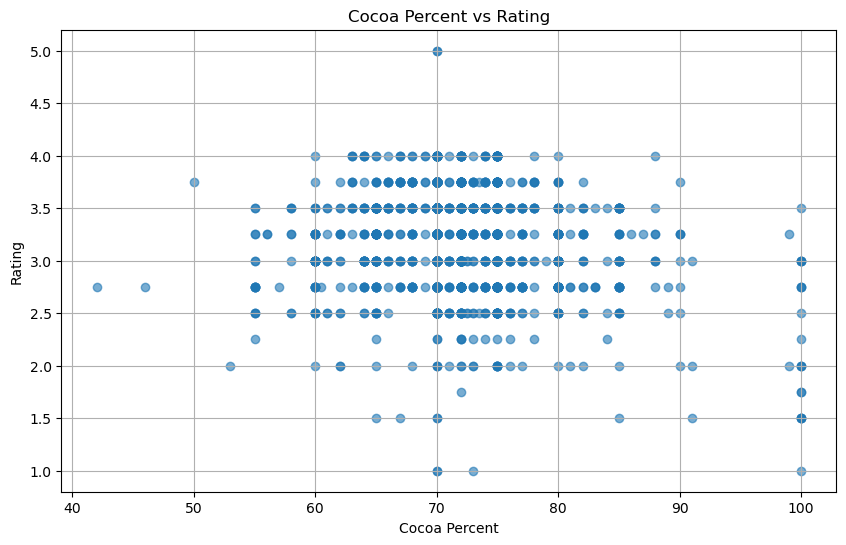

In [349]:
# Scatter plot for Cocoa Percent vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(chocolate_data['Cocoa_percent'], chocolate_data['Rating'], alpha=0.6)
plt.title("Cocoa Percent vs Rating")
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

In [350]:
#Relationship between Core Type and Quality (Mean Score Comparison and ANOVA)

bean_type_groups = [group['Rating'].values for name, group in chocolate_data.groupby('Bean_type')]
anova_result = f_oneway(*bean_type_groups)
print("ANOVA Test Result:", anova_result)

ANOVA Test Result: F_onewayResult(statistic=2.3309727724424403, pvalue=5.948207962005912e-06)


In [351]:
#Relationship between Production Site and Quality (Average Score Comparison)
location_mean_ratings = chocolate_data.groupby('Company_location')['Rating'].mean()
location_mean_ratings = location_mean_ratings.sort_values(ascending=False)
print(location_mean_ratings)



Company_location
Chile                3.750000
Amsterdam            3.500000
Netherlands          3.500000
Philippines          3.500000
Iceland              3.416667
Vietnam              3.409091
Brazil               3.397059
Poland               3.375000
Australia            3.357143
Guatemala            3.350000
Switzerland          3.342105
Singapore            3.333333
Italy                3.325397
Scotland             3.325000
Canada               3.318548
Argentina            3.305556
Denmark              3.283333
Spain                3.270000
France               3.251603
Suriname             3.250000
Israel               3.250000
Finland              3.250000
Fiji                 3.250000
Bolivia              3.250000
Russia               3.250000
Austria              3.240385
Honduras             3.208333
Hungary              3.204545
South Korea          3.200000
Domincan Republic    3.200000
New Zealand          3.191176
Germany              3.178571
Venezuela            3.

This analysis is important to understand the quality differences of chocolates produced in different countries. ANOVA can be performed to further verify whether there is a significant difference between the place of production and the quality of chocolate.

In [353]:
location_groups = [group['Rating'].values for name, group in chocolate_data.groupby('Company_location')]
anova_result = f_oneway(*location_groups)
anova_result

F_onewayResult(statistic=1.7916423777575565, pvalue=0.00025491087085811187)

Since the p-value is less than 0.05, we can conclude that there are statistically significant differences in chocolate scores according to the place of production, i.e. country. This indicates that the country of production may have an impact on the quality of chocolate.